# **ZOMATO DATA ANALYSIS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**30/oct/2023**

In [ ]:
#refer krish naik eda

**Loading dataset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/MY DS PROJECT PRACTICEOCT 23/zomato.csv")

UnicodeDecodeError: ignored

In [ ]:

# Try reading the CSV file with Latin-1 encoding
df = pd.read_csv("/content/drive/MyDrive/MY DS PROJECT PRACTICEOCT 23/zomato.csv", encoding='latin-1')


In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


* Restaurant Id: Unique id of every restaurant across various cities of the world
- Restaurant Name: Name of the restaurant
- Country Code: Country in which restaurant is located
- City: City in which restaurant is located
- Address: Address of the restaurant
- Locality: Location in the city
- Locality Verbose: Detailed description of the locality
- L ongitude: Longitude coordinate of the restaurant’s location
- Latitude: Latitude coordinate of the restaurant’s location
- Cuisines: Cuisines offered by the restaurant
- Average Cost for two: Cost for two people in different currencies (local currency)
- Currency: Currency of the country
- Has Table booking: yes/no
- Has Online delivery: yes/ no
- Is delivering: yes/ no
- Switch to order menu: yes/no
- Price range: range of price of food
- Aggregate Rating: Average rating out of 5
- Rating color: depending upon the average rating color
- Rating text: text on the basis of rating of rating
- Votes: Number of ratings given

**1.BASIC DOMAIN ANALYSIS**

In [ ]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
df.index


RangeIndex(start=0, stop=9551, step=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

* missing vlaues ,duplicates values
* explore categorical varaibles
* check the relationship

In [ ]:
#check missing values
df.isnull().sum() # no null

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
# check duplicates :
df.duplicated().sum() # no duplicates


0

In [ ]:
df.shape

(9551, 21)

In [ ]:
#here some column are not important

In [ ]:
df['Country Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208])

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df_country=pd.read_excel('/content/drive/MyDrive/MY DS PROJECT PRACTICEOCT 23/Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [ ]:
# we want to merge two datframes for country code

final_df=pd.merge(df,df_country, on='Country Code',how='left')
#his indicates the type of join you're performing. A left join includes all the rows from the left DataFrame (df),
# and the matched rows from the right DataFrame (df_country).

In [ ]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [ ]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [ ]:
df=final_df.copy()
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [ ]:
df['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

***MOSTLY IN Indai zomato servieces is top most 8652, then us ,uk and so on ***

In [ ]:
country_names=df.Country.value_counts().index
print(country_names)

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')


In [ ]:
country_values=df.Country.value_counts().values
print(country_values)

[8652  434   80   60   60   60   40   34   24   22   21   20   20   20
    4]


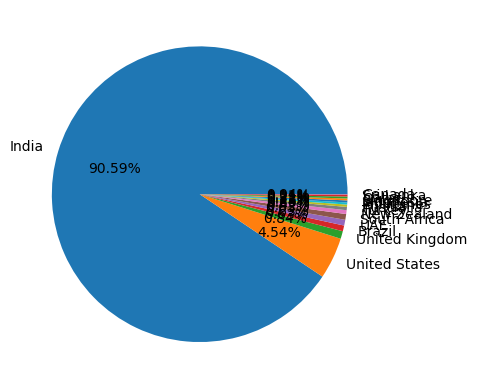

In [ ]:
plt.pie(country_values,labels=country_names,autopct='%1.2f%%')
plt.show()

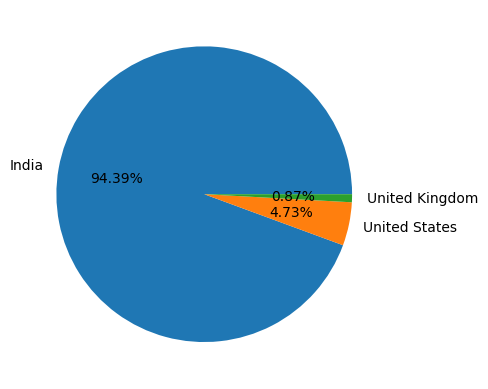

In [ ]:
# it not  gives proper intrepetation
plt.pie(country_values[:3],labels=country_names[:3],autopct='%1.2f%%') #only top 3 countries %
plt.show()

*INSIGHT: FROM ABOVE PIE CHART TOP 3CCOUNTRIES INDIA >USA>UK *

In [ ]:
df.columns
# Aggregate rating', 'Rating color', 'Rating text' check rating and combine using groupby

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [ ]:
df.groupby(['Aggregate rating', 'Rating color', 'Rating text'])

In [ ]:
df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

* Rating color is white aggregate ratinjg is zero it is not rated*
* rating color red means poor rating ,orange is average ,yellow is good ,green is very good , dark green is excellent rating values 4.5to 4.9

In [ ]:
df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index()

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [ ]:
ratings=df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating_count'}) # change o column naem into rating_count


In [ ]:
ratings

,Aggregate rating,Rating color,Rating text,Rating_count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


**ABOVE OBESERVATIONS :**
* 1. WHEN RATING IS BETWEEN 4.5 TO 4.9 ITS EXCELLENT
* 2 WHEN  RATING IS BETWEEN 4.0 TO 4.4 ITS VERY GOOD
* 3. WHEN RATING IS BETWEEN 3.5 TO 3.9 ITS  GOOD
* 4.WHEN RATING IS BETWEEN 2.5.0 to 3.4 TO  ITS  AVERAGE
* 5 WHEN RATING IS BETWEEN 1.8 TO 2.4 IS POOR

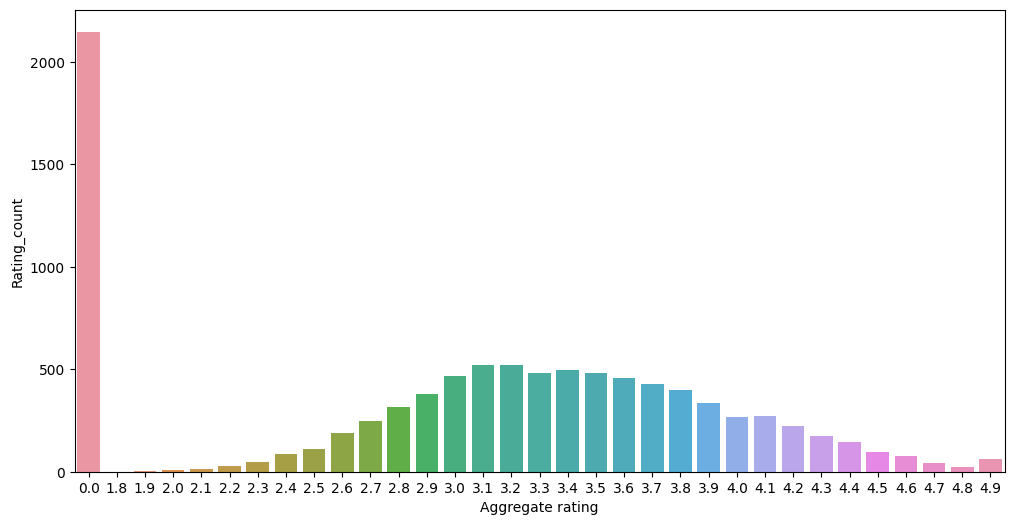

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(data=ratings,x='Aggregate rating',y='Rating_count')
plt.show()

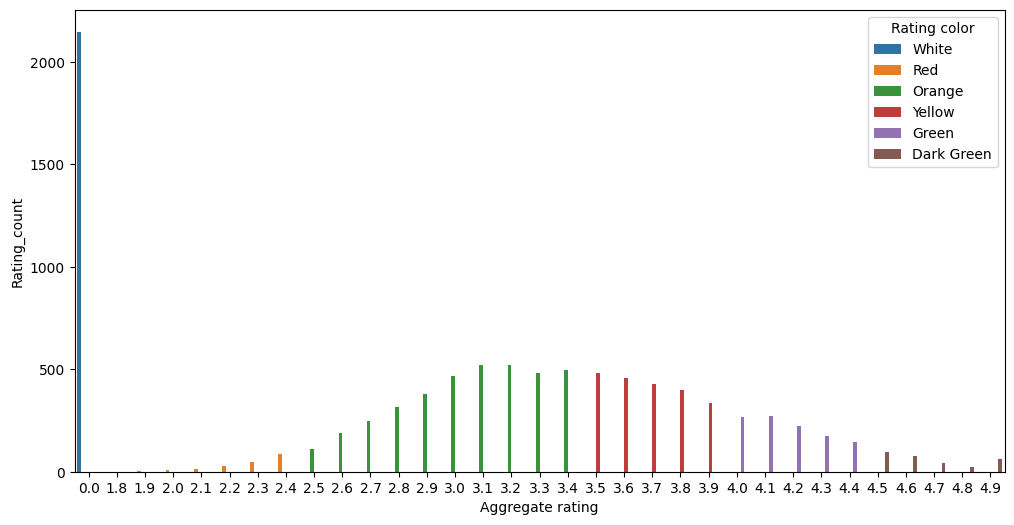

In [ ]:
# want Rating color features also
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(data=ratings,x='Aggregate rating',y='Rating_count',hue='Rating color')
plt.show()


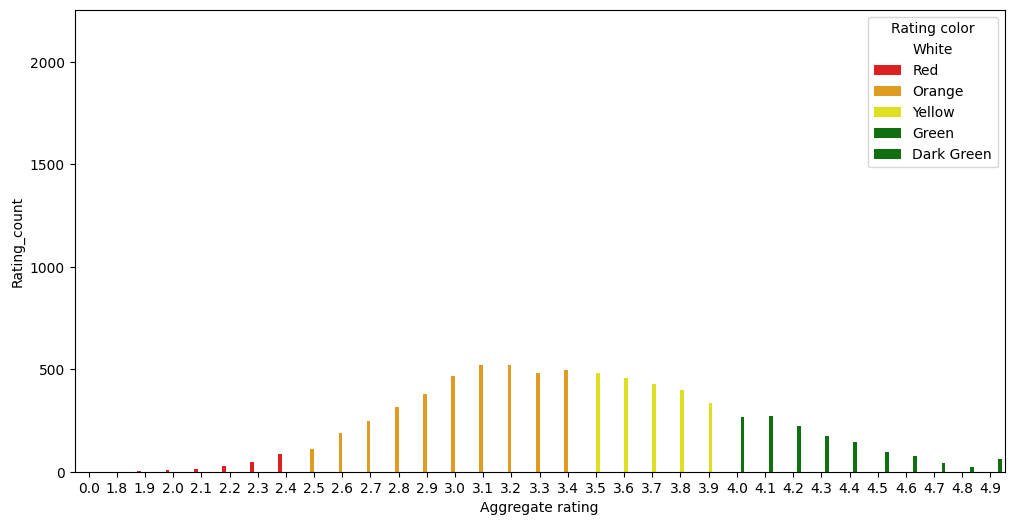

In [ ]:
#here color is not matching in above graph so want tom atch use palette
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(data=ratings,x='Aggregate rating',y='Rating_count',hue='Rating color',palette=['white','red','orange','yellow','green','green'])
plt.show()


**INSIGHT FROM ABOVE GRAPH:**
* NOT RATED COUNT IS VERY HIGH 8 MAXIMUM RATINGS BETWEEN 2.5 TO 3.5
* Excellent rating count is very low

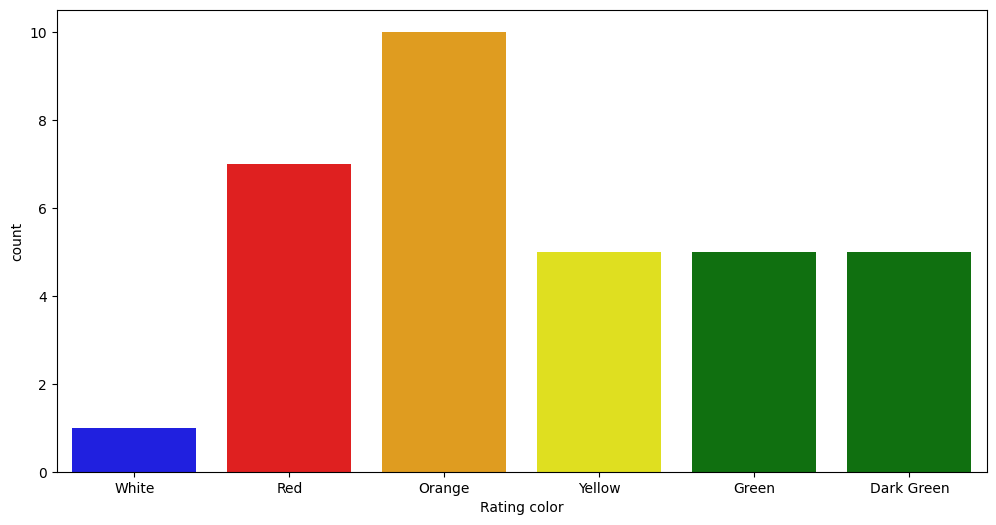

In [ ]:
# only show rating color counting using count plot

sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','green'])
plt.show()

** orange color means average rating count is more**

In [ ]:
#find the country names that has zero 0 rating ?

df[df['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


**Obesrvations:**
* rating color white count mostly in INDia =2139 means not rated

In [ ]:
df.groupby(['Aggregate rating','Country']).size().reset_index().head(5)
# find aggreagate rating ,country count

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


In [ ]:
# find out whci country uses currency?
df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [ ]:
### Which Countries do have online deliveries option?
df[df['Has Online delivery'] =="Yes"].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

**TOP MOST IN INDAI IS ONLINE DELIVERY COUNT 2423 THEN UAE=28 **

In [ ]:
df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()
#CHECK COUNTRY WITH ONLINE DELIVERY COUNT

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


* NO ONLINE DELIVERY AS WELL ONLINE DELIVERY SIZE : TOP MOST INDIA
* yes=2423 ,no=6229
* ONLINE DELIVERY AVAILBLE IN only India and UAE

In [ ]:
# TOP 5 CITIES DISRBUTION ?

top_cities_5 =df['City'].value_counts().nlargest(5)
print(top_cities_5)

New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: City, dtype: int64


In [ ]:
#top most cities uses zomato service=NEW DELHII ,GURGOAN NOIDA FARIDABAD
top_cities =df['City'].value_counts().nlargest(10)
print(top_cities)

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: City, dtype: int64


In [ ]:
city_values=df.City.value_counts().values
city_labels=df.City.value_counts().index

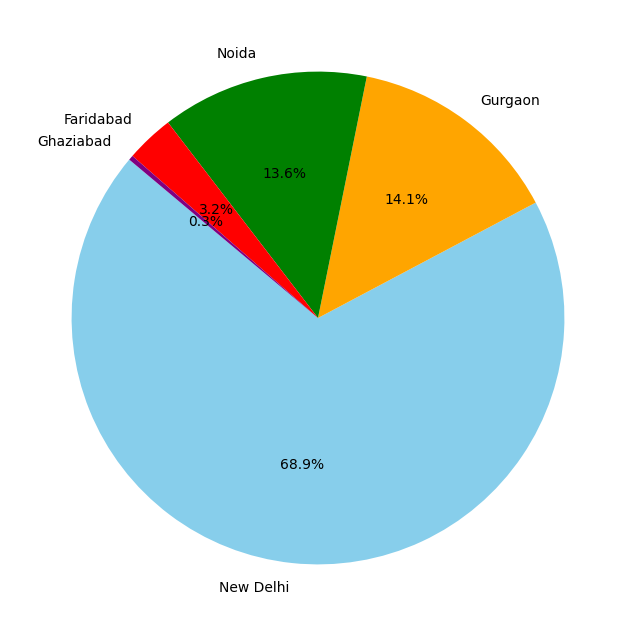

In [ ]:
plt.figure(figsize=(8, 8))  # This sets the figure size to 8x8 inches.

plt.pie(top_cities_5, labels=top_cities_5.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.show()

**NEW DELHI CITY FROM INDIA PROVIDES/USES  TOP MOST ZOMATO SERVICES =68.9**

North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: Cuisines, dtype: int64


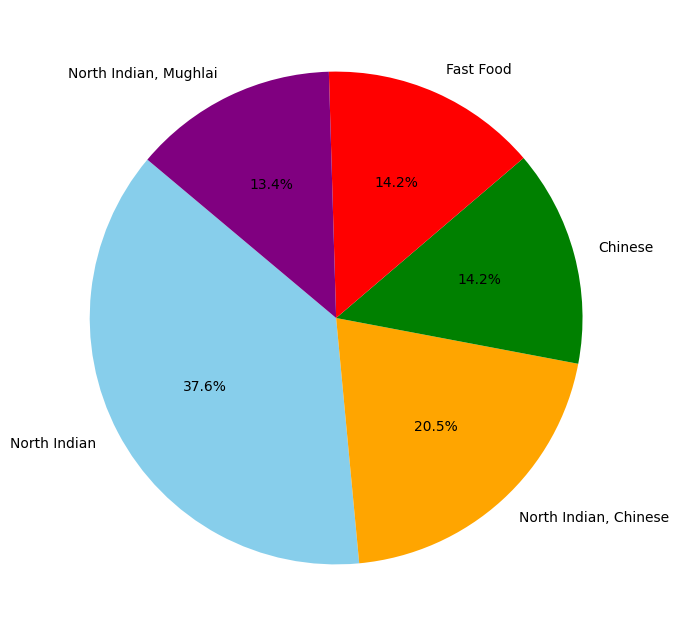

In [ ]:
top_Cuisines_5 =df['Cuisines'].value_counts().nlargest(5)
print(top_Cuisines_5)
plt.figure(figsize=(8, 8))  # This sets the figure size to 8x8 inches.

plt.pie(top_Cuisines_5, labels=top_Cuisines_5.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.show()


In [ ]:
plt.figure(figsize=(8, 8))  # This sets the figure size to 8x8 inches.

plt.pie(top_cities_5, labels=top_cities_5.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.show()

In [ ]:
# find top 10 cuisines?
top_Cuisines_10 =df['Cuisines'].value_counts().nlargest(10)
print(top_Cuisines_10)
#strret food ,bakery shops not mosty uses zomato services


North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64


In [ ]:
''' north indain food ,chinese cuisines are most popular'''

' north indain food ,chinese cuisines are most popular'

In [ ]:
top_cuisines_10 = df[['Cuisines', 'City']].value_counts().nlargest(10)
print(top_cuisines_10)


Cuisines                        City     
North Indian                    New Delhi    658
North Indian, Chinese           New Delhi    284
Fast Food                       New Delhi    242
Chinese                         New Delhi    228
North Indian, Mughlai           New Delhi    207
Cafe                            New Delhi    158
Street Food                     New Delhi    123
Bakery                          New Delhi    122
North Indian, Mughlai, Chinese  New Delhi    120
Bakery, Desserts                New Delhi    117
dtype: int64


In [ ]:
# What is the average cost for two people at restaurants in each city?

avg_cost_by_city = df.groupby('City')['Average Cost for two'].mean()
print(avg_cost_by_city)

City
Abu Dhabi           182.000000
Agra               1065.000000
Ahmedabad           857.142857
Albany               19.750000
Allahabad           517.500000
                      ...     
Weirton              25.000000
Wellington City      71.250000
Winchester Bay       25.000000
Yorkton              25.000000
ÛÁstanbul            81.428571
Name: Average Cost for two, Length: 141, dtype: float64


In [ ]:
# which city has most no. of restruants ?
city_with_most_restaurants = df['City'].value_counts().nlargest(10)
city_with_most_restaurants

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: City, dtype: int64

In [ ]:
city_with_most_restaurants = df['City'].value_counts().nlargest(1).index[0]
city_with_most_restaurants #top most

'New Delhi'

In [ ]:
#ow many restaurants in each price range (e.g., cheap, moderate, expensive)?
restaurants_by_price_range = df.groupby('Price range').size()
print(restaurants_by_price_range)


Price range
1    4444
2    3113
3    1408
4     586
dtype: int64


In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
df.describe(include='O')

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text,Country
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6,15
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average,India
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737,8652


In [ ]:
# which restruant has most votes ?

restaurant_with_most_votes = df[df['Votes'] == df['Votes'].max()]['Restaurant Name'].iloc[0]


restaurant_with_most_votes

'Toit'

In [ ]:

restaurant_with_most_votes10 = df[df['Votes'] == df['Votes'].max()]['Restaurant Name'].nlargest(10)


restaurant_with_most_votes10

TypeError: ignored

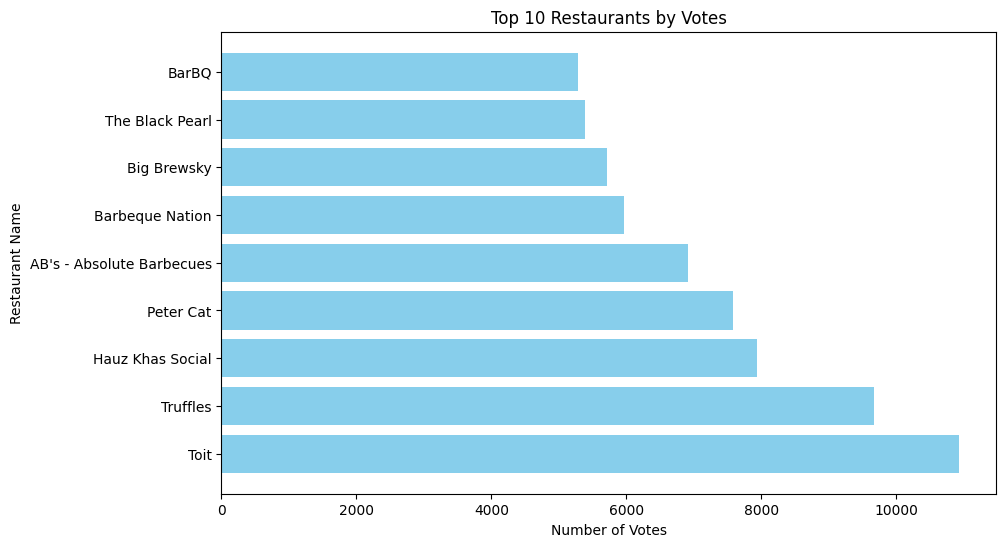

In [ ]:
top_restaurants_by_votes = df.nlargest(10, 'Votes')

plt.figure(figsize=(10, 6))
plt.barh(top_restaurants_by_votes['Restaurant Name'], top_restaurants_by_votes['Votes'], color='skyblue')
plt.xlabel('Number of Votes')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Restaurants by Votes')
plt.show()

In [ ]:
# Get unique countries and cities from the top 10 restaurants
top_countries = top_restaurants_by_votes['Country'].unique()
top_cities = top_restaurants_by_votes['City'].unique()
print(top_countries)
print(top_cities)

['India']
['Bangalore' 'New Delhi' 'Kolkata' 'Hyderabad']


In [ ]:
country_counts = top_restaurants_by_votes['Country'].value_counts()
city_counts = top_restaurants_by_votes['City'].value_counts()
print(country_counts )
print(city_counts)

India    10
Name: Country, dtype: int64
Bangalore    5
Kolkata      3
New Delhi    1
Hyderabad    1
Name: City, dtype: int64


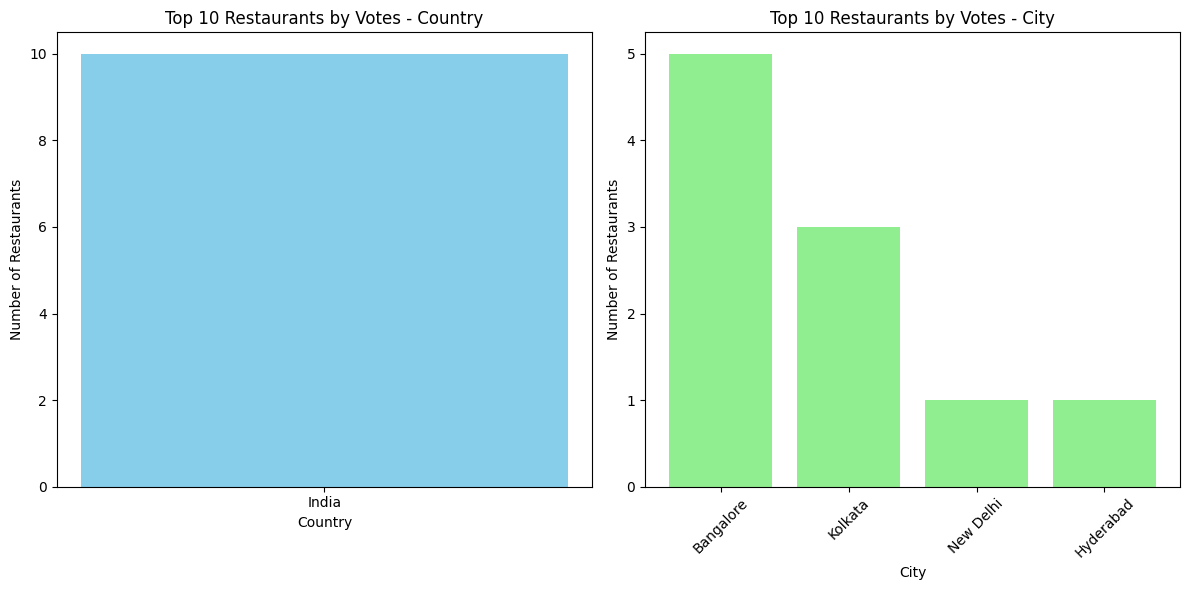

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot by Country
axes[0].bar(country_counts.index, country_counts.values, color='skyblue')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of Restaurants')
axes[0].set_title('Top 10 Restaurants by Votes - Country')

# Plot by City
axes[1].bar(city_counts.index, city_counts.values, color='lightgreen')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Number of Restaurants')
axes[1].set_title('Top 10 Restaurants by Votes - City')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# most top votes only country is INDIA ,top 5 cities gives maximum votes are BANGLORE, KOLKATA

In [ ]:
# check heatmap ?

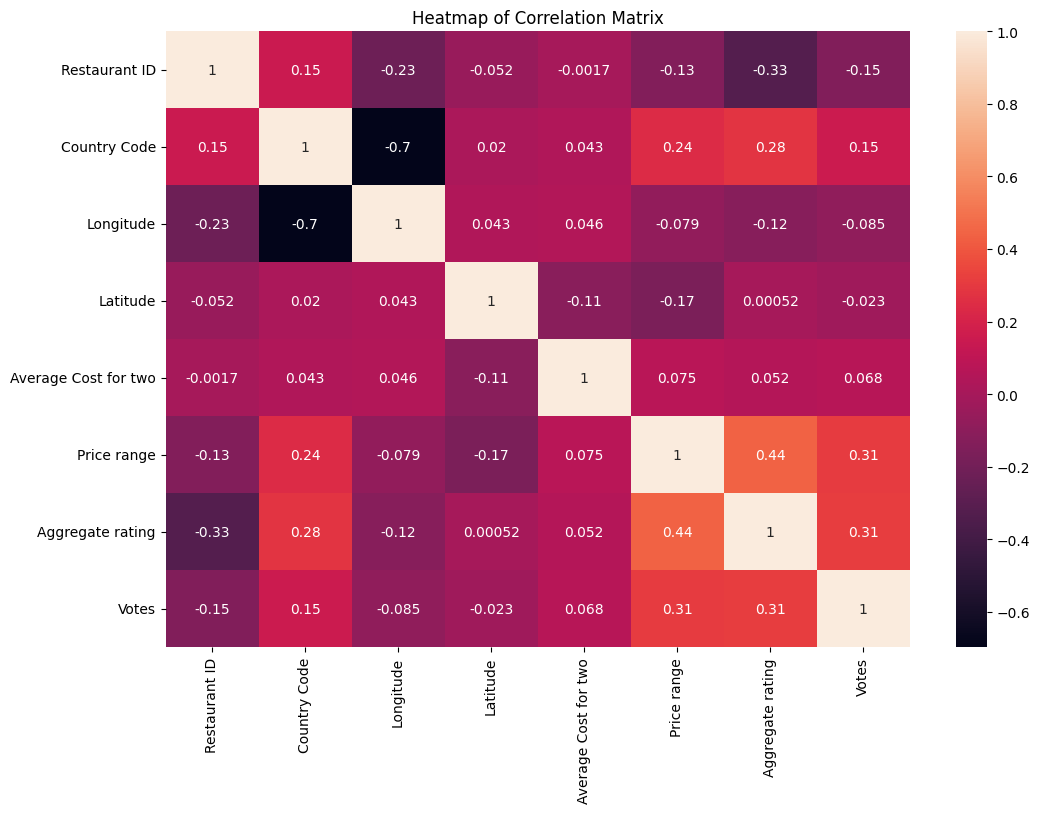

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()
#that represents the correlations between numerical columns in your DataFrame. It helps to identify relationships and patterns in the data.

# **2.DATA PREROCESSING**